# Tensorized Gauss quadrature

This examples shows how to perform tensorized Gauss quadrature using `GaussProductExperiment` class. To do this, we consider Ishigami test function. 

## Ishigami test function

The test function is:
$$
Y=g(X_1,X_2,X_3)=\sin(X_1) + a \sin^2(X_2) + b X_3^4 \sin(X_1)
$$
where $X_1,X_2,X_3$ are three independent random variables uniform in $[-\pi,\pi]$.
The parameters $a = 7$ and $b = 0.1$.

Its expected value is :
$$
\mathbb{E}(Y) = \frac{a}{2} = 3.5
$$

## Tensorized gaussian rule

Let $g : \mathcal{X} \rightarrow \mathbb{R}$ be a function where $\mathcal{X} \subset \mathbb{R}^p$ is the domain of the function. Let $f$ be a density probability function which support is $\mathcal{X}$. We consider the integral :
$$
\int_{\mathcal{X}} g(\boldsymbol{x}) f(\boldsymbol{x}) d\boldsymbol{x}.
$$

A tensorized Gaussian rule uses componentwise Gaussian rules to create an integration formula. It uses the weighted rule :
$$
\int_{\mathcal{X}} g(\boldsymbol{x}) f(\boldsymbol{x}) d\boldsymbol{x}
\approx \sum_{j = 1}^n w_j g\left(\boldsymbol{x}^{(j)}\right)
$$
where $\{w_j\}_{j = 1, ...,n}$ are nonnegative weights and $\left\{\boldsymbol{x}^{(j)}\right\}_{j = 1, ...,n}$ are the Gauss nodes. 

Reference
---------------
- Ishigami, T. and Homma, T. (1990). An importance quantification technique in uncertainty analysis for computer models. In 1990 Proceedings. First International Symposium on Uncertainty Modeling and Analysis, pages 398–403. IEEE.

In [1]:
import openturns as ot
import openturns.viewer as otv
from openturns.usecases import ishigami_function as ishigami_function

In [2]:
im = ishigami_function.IshigamiModel()
print(im.model)

ParametricEvaluation([X1,X2,X3,a,b]->[sin(X1) + a * sin(X2)^2 + b * X3^4 * sin(X1)], parameters positions=[3,4], parameters=[a : 7, b : 0.1], input positions=[0,1,2])


Create a tensorized Gauss rule with marginal degrees equal to 10 in each dimension. 

In [3]:
input_dimension = im.inputDistribution.getDimension()
print("Input dimension : ", input_dimension)
number_of_nodes_in_each_direction = 10
marginalDegrees = [number_of_nodes_in_each_direction] * input_dimension
experiment = ot.GaussProductExperiment(im.inputDistribution, marginalDegrees)
sample, weights = experiment.generateWithWeights()
sample_size = sample.getSize()
print("Sample size = ", sample_size)

Input dimension :  3
Sample size =  1000


Plot the points in the sample to see the Gaussian structure.

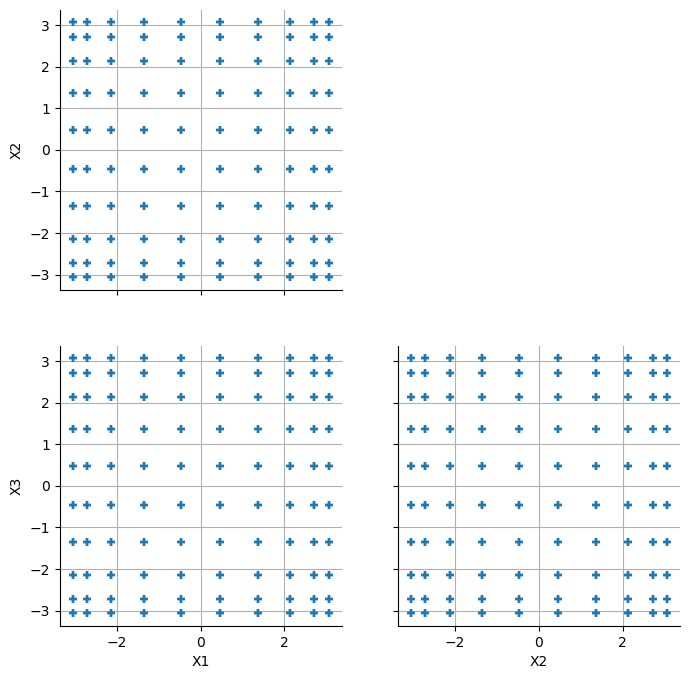

In [4]:
graph = ot.VisualTest.DrawPairs(sample)
view = otv.View(graph, figure_kw={"figsize": (8.0, 8.0)})

Notice that the tensorized Gauss-Legendre rule has 10 nodes in each direction. This is a consequence of the input distribution of the Ishigami model, which has distribution $\mathcal{U}(-\pi, \pi)$.

We perform the integration by combining the weights and the points in the sample.

In [5]:
integrand_value = im.model(sample)
integral_value = 0.0
for i in range(sample_size):
    integral_value += weights[i] * integrand_value[i, 0]
print("Integral = %.4f" % (integral_value))

Integral = 3.5000


In [6]:
print("Expectation(Y) = %.4f" % (im.expectation))

Expectation(Y) = 3.5000


This shows that the Gaussian quadrature of the Ishigami test function performs correctly.